In [97]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [61]:
#scikit-learn example
#load dataset into diabetes dataframe and target dataframe/series
df_diabetes, df_target = datasets.load_diabetes(return_X_y=True, as_frame = True)

#select independant variable
df_bmi = df_diabetes[["bmi"]]

#make df_target a dataframe instead of a series so it can be passed to fit function
df_target = df_target.to_frame()

#split into training/test datasets
train_x = df_bmi[:-20]
test_x = df_bmi[-20:]

#split targets into training/testing data
train_y = df_target[:-20]
test_y = df_target[-20:]


Coefficients: 
 [[938.23786125]]
Mean squared error: 2548.07
Coefficient of determination: 0.47


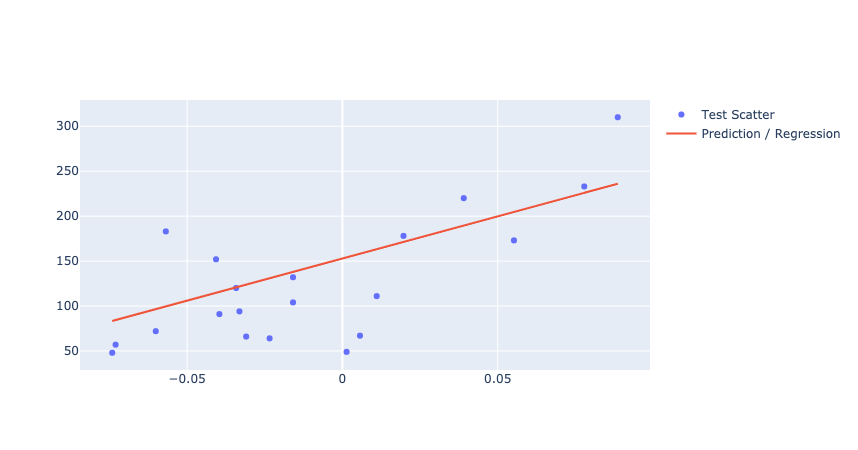

In [89]:
#create linear regression object
regr = linear_model.LinearRegression()

#train model using training data
regr.fit(train_x, train_y)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(test_x)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_y, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_y, diabetes_y_pred))

#merge because having issues with plotting one column dataframes for some reason
df_test = pd.concat([test_x,test_y], axis=1)

#convert diabetes y_pred to plot
df_diabetes_y_pred = pd.DataFrame(diabetes_y_pred)


#plot graphs

fig = go.Figure()

fig.add_trace(go.Scatter( 
             x = df_test.loc[:,"bmi"],
             y = df_test.loc[:,"target"],
             mode = 'markers', name = 'Test Scatter')
             )

fig.add_trace(go.Scatter(
             x = df_test.loc[:,"bmi"],
             y = df_diabetes_y_pred.iloc[:,0],
             mode = 'lines', name = 'Prediction / Regression')
             )

fig.update_layout()
fig.show()

In [117]:
# question 1

# import data

df_train = pd.read_csv('/Users/teissherman/Desktop/Principles of Data Science/Week 5/train.csv')



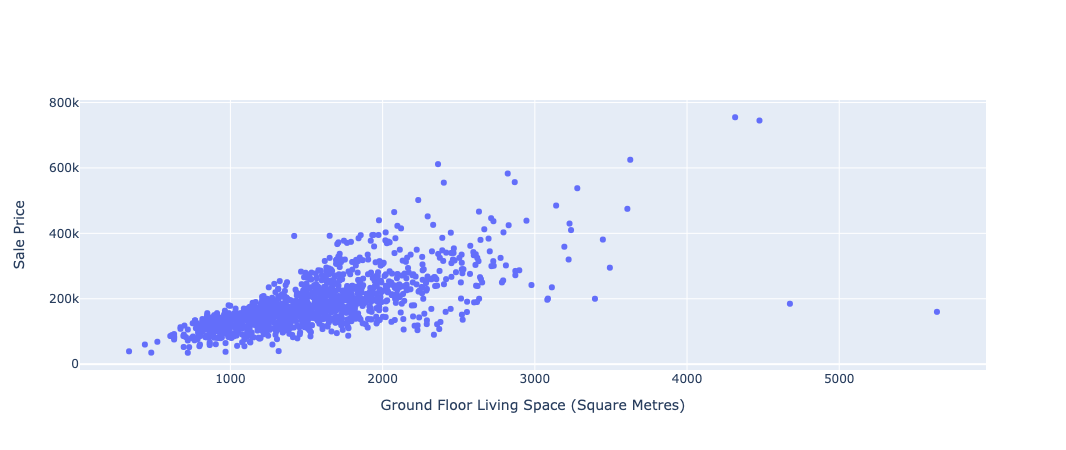

In [105]:
#filter for relevant columns
df_housing_data = df_train.loc[:,["GrLivArea","SalePrice"]]

#plot for visual inspection of selected variables

fig = go.Figure()

fig.add_trace(go.Scatter(
                x = df_housing_data.loc[:,"GrLivArea"],
                y = df_housing_data.loc[:,"SalePrice"],
                mode = 'markers'))

fig.update_layout(
            xaxis_title="Ground Floor Living Space (Square Metres)",
            yaxis_title="Sale Price")

fig.show()


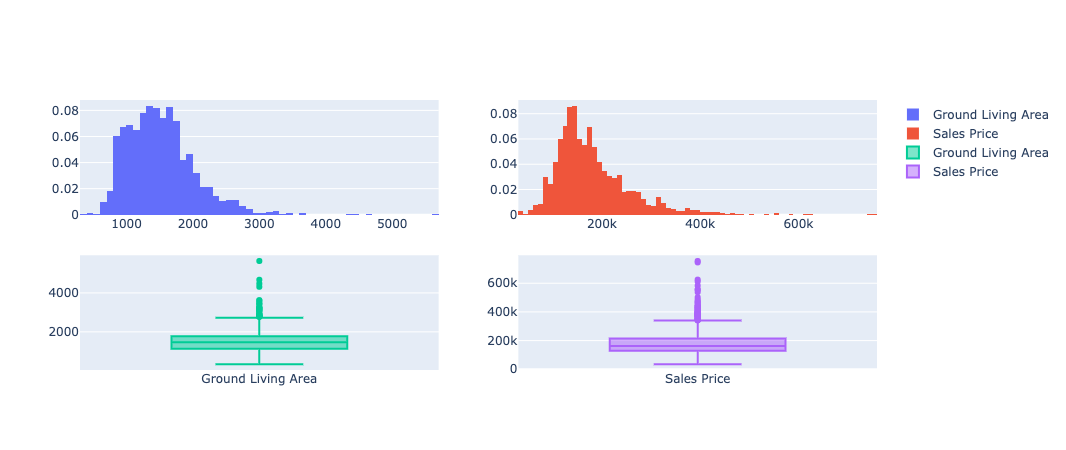

In [122]:
#there is a clear relationship, but there are some outliers, we will use boxplots to visualize these before filtering them out
fig = make_subplots(rows=2, cols=2)
fig.add_trace(go.Histogram(x=df_housing_data.loc[:,'GrLivArea'], 
                           histnorm='probability',
                           name = 'Ground Living Area',
                           xbins=dict(
                            size=100)),
                            row=1, col=1)
fig.add_trace(go.Histogram(x=df_housing_data.loc[:,'SalePrice'], 
                           histnorm='probability',
                           name = 'Sales Price'), 
                            row=1, col=2)
fig.add_trace(go.Box(y=df_X_GR, name="Ground Living Area"), row=2, col=1)
fig.add_trace(go.Box(y=df_Y_price, name = "Sales Price"), row=2, col=2)
fig.show()

In [135]:
#calculate standard deviations and mean as filters for outliers
mean_livingarea = df_housing_data.loc[:,'GrLivArea'].mean() 
mean_salesprice = df_housing_data.loc[:,'SalePrice'].mean()

std_livingarea = df_housing_data.loc[:,'GrLivArea'].std()
std_salesprice = df_housing_data.loc[:,'SalePrice'].std()




In [153]:
#filter for outliers
df_housing_data['isOutlierArea'] = 0
df_housing_data['isOutlierPrice'] = 0

df_housing_data.loc[(df_housing_data['GrLivArea'] > mean_livingarea+ (4*std_livingarea)) | (df_housing_data['GrLivArea'] < mean_livingarea - (4*std_livingarea)),'isOutlierArea'] = 1  
df_housing_data.loc[(df_housing_data['SalePrice'] > mean_salesprice+(4*std_salesprice)) | (df_housing_data['SalePrice'] < mean_salesprice - (4*std_salesprice)),'isOutlierPrice'] = 1 
    

In [154]:
# news dfs for outliers
df_both_normal = df_housing_data.loc[(df_housing_data['isOutlierArea'] == 0) & (df_housing_data['isOutlierPrice'] == 0), ['GrLivArea','SalePrice']]
df_area_outlier = df_housing_data.loc[(df_housing_data['isOutlierPrice'] == 0) & (df_housing_data['isOutlierArea'] == 1), ['SalePrice','GrLivArea']]
df_price_outlier = df_housing_data.loc[(df_housing_data['isOutlierPrice'] == 1) & (df_housing_data['isOutlierArea'] == 0), ['SalePrice','GrLivArea']]
df_both_outlier = df_housing_data.loc[(df_housing_data['isOutlierArea'] == 1) & (df_housing_data['isOutlierPrice'] == 1), ['GrLivArea','SalePrice']]


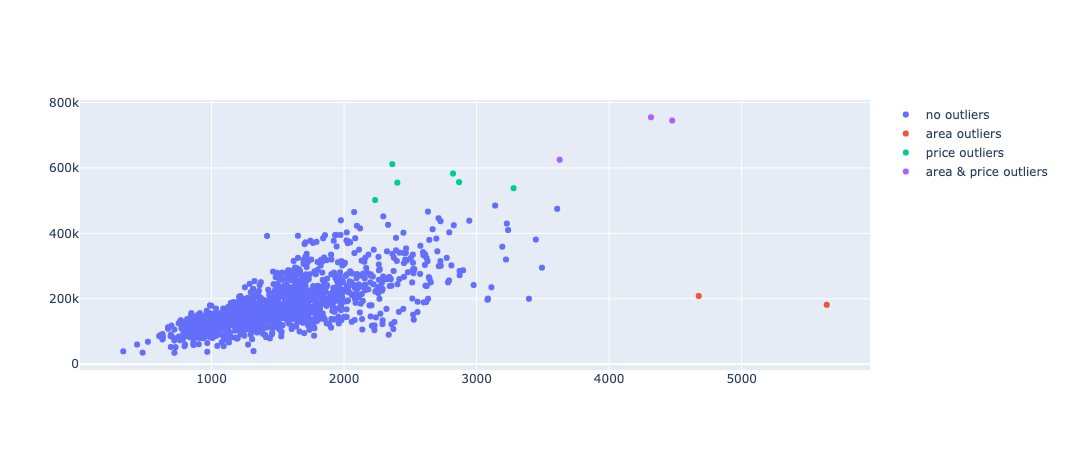

In [247]:
#plot scatter with outliers 
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_both_normal['GrLivArea'], y=df_both_normal['SalePrice'], mode = 'markers', name= 'no outliers'))
fig.add_trace(go.Scatter(x=df_area_outlier['GrLivArea'], y=df_both_normal['SalePrice'], mode = 'markers', name= 'area outliers'))
fig.add_trace(go.Scatter(x=df_price_outlier['GrLivArea'], y=df_price_outlier['SalePrice'], mode = 'markers', name= 'price outliers'))
fig.add_trace(go.Scatter(x=df_both_outlier['GrLivArea'], y=df_both_outlier['SalePrice'], mode = 'markers', name= 'area & price outliers'))
fig.show()


In [216]:
#after filtering out outlier data, split data into training and test data, ideally would use k-fold here but alas
train = df_both_normal.iloc[0:1000]
test =df_both_normal.iloc[1000:1449]


In [213]:
#create linear regression object
regr = linear_model.LinearRegression()

#train model using training data
regr.fit(train[['GrLivArea']],train[['SalePrice']])

# Make predictions using the testing set
salesprice_y_pred = regr.predict(test[['GrLivArea']])

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test[['SalePrice']], salesprice_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test[['SalePrice']], salesprice_y_pred))


Coefficients: 
 [[111.562869]]
Mean squared error: 2756183018.57
Coefficient of determination: 0.40


In [232]:
y_pred = pd.DataFrame(salesprice_y_pred)

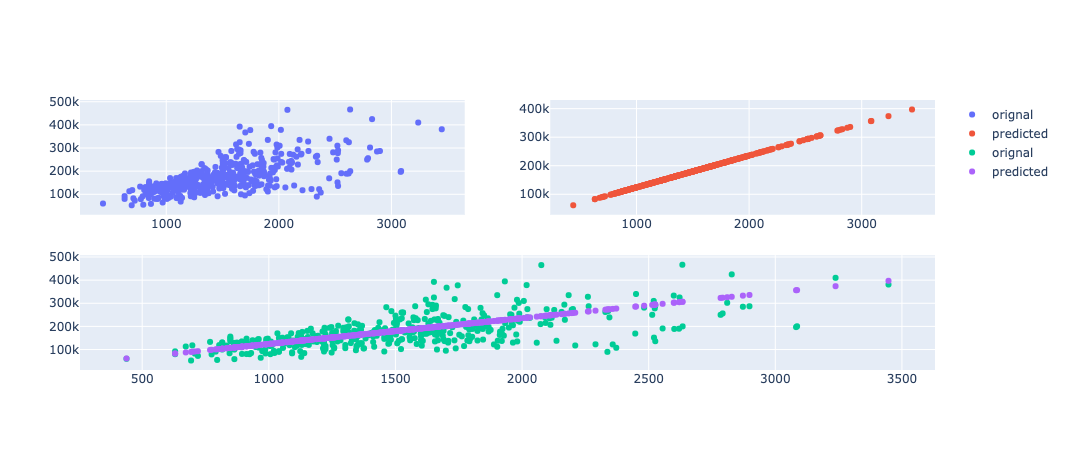

In [248]:
#plot predicted vs test values 
fig = go.Figure()
fig = make_subplots(rows=2, cols=2, specs=[[{}, {}],
           [{"colspan": 2}, None]])
fig.add_trace(go.Scatter(x= test.loc[:,'GrLivArea'],y=test.loc[:,'SalePrice'], mode='markers', name='orignal'),row=1,col=1)
fig.add_trace(go.Scatter(x=test.loc[:,'GrLivArea'],y=y_pred.iloc[:,0], mode='markers', name='predicted'), row=1, col=2)
fig.add_trace(go.Scatter(x= test.loc[:,'GrLivArea'],y=test.loc[:,'SalePrice'], mode='markers', name='orignal'),row=2,col=1)
fig.add_trace(go.Scatter(x=test.loc[:,'GrLivArea'],y=y_pred.iloc[:,0], mode='markers', name='predicted'), row=2, col=1)
fig.show()

In [ ]:
#calculate residuals 



In [ ]:
#multivariate linear regression